# Exercício Programa 2

Nesse exercício, vamos praticar um pouco do conteúdo dado em aula. Para os exercícios (1) a (5), vamos utilizar as classes dos classificadores lineares e de plotagem de dados apresentados por Sebastian Rascka e Vahid Mirjalili no livro "Python Machine Learning". Dos exercícios (6) a (9), os classificadores implementados pelo scikit-learn serão utilizados.

### Exercício 1

O Exercício disponibiliza o código desenvolvido no livro ("Python Machine Learning") na pasta "sebastian". Nessa pasta contém os seguintes arquivos:

- **adaline:** Contém as classes **AdalineGD** que implementa o classificador linear "Adaline" visto em aula com o algoritmo "em Batch" e **AdalineSGD** que implementa o classificador linear "Adaline" visto em aula com o algoritmo "estocástico".
- **perceptron:** Contém a classe **Perceptron** que implementa o classificador linear **Perceptron** com o algoritmo de Perceptron do Rosenblatt.
- **logistic_regression:** Contém a classe **LogisticRegressionGD** que implementa o classificador de "Regressão Logística".
- **ploting:** Contém a função **plot_decision_regions** que plota a região de decisão do classificador junto com um conjunto de vetores de características "X" e suas classes "y" e destaca um subconjunto dos mesmos indicado pelos índices em X e y no parâmetro **test_idx**.

Note que a implementação dos classificadores lineares de Raschka e Mirjalili possuem algoritmos de aprendizado que sempre se encerra depois de uma certa quantidade de iterações (épocas). Nesse exercício pede-se, para que você modifique as implementações disponibilizadas para que cada classe de classificador linear (**AdalineGD**, **AdalineSGD**, **Perceptron** e **LogisticRegressionGD**) receba um limiar de custo em seu construtor que determina a quantidade de iterações do algoritmo de aprendizado da seguinte maneira:

- Se o limiar de custo e o número de iterações (n_itr) não forem nulos, então o algoritmo se encerra quando o custo da iteração atual ser menor que o limiar de custo ou se algoritmo já executou n_itr épocas.
- Se o limiar de custo for nulo, então o algoritmo de aprendizado se encerra apenas depois de executar n_itr épocas.
- Se o número de iterações (n_itr) for nulo, então o algoritmo se encerra apenas quando o custo da iteração atual for menor que o limiar de custo.
- Sempre considere que ou limiar de custo, ou número de iterações será não nulo.

Na implementação do **Perceptron**, veja que não existe uma lista de custos como nas outras implementações, você deve deve considerar a lista de erros como o custo. Neste caso o custo $c$ do  **Perceptron** será:

$$ c(w,b) = \sum_{i=1}^n L(f(\vec{x}^{(i)}, \vec{w}, b), y^{(i)})  $$

onde,

$$ 
\begin{align*}
L(y', y) = \begin{cases} 0 \textrm{   se } y = y' \\ 1 \textrm{   se } y \not= y' \end{cases} \\
f(\vec{x}^{(i)}, \vec{w}, b) = \begin{cases} 
    1  \textrm{    se } \vec{w}^t \vec{x}^{(i)} + b \geq 0 \\
    -1 \textrm{    se } \vec{w}^t \vec{x}^{(i)} + b < 0
\end{cases}
\end{align*}
$$

### Exercício 2

No pacote do exercício, existe uma pasta chamada "dataset", essa pasta contém um "arquivo csv" chamado "ex2.data". Esse dataset é composto de duas características e mais uma classe "A" ou "B" para cada linha.

Utilizando o teorema de convergência do **Perceptron** e os classificadores modificados do exercício anterior, mostre que o dataset é linearmente separável. Apresente a reta que separe os dados e número de iterações necessárias até a convergência.

OBS.: Você pode (inclusive é encorajado) a modificar a classe **Perceptron** para encontrar as informações não disponíveis solicitadas no exercício.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import sys
from sebastian import perceptron, adaline, ploting, logistic_regression
from benlau import polynomials
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("dataset/ex2.data", sep=";", header=0, names=['x1', 'x2', 'y'])
df['class'] = np.where(df['y'] == 'A', 1, -1)
df.drop(['y'], inplace=True, axis=1)
X, y = df.iloc[:, :2].values, df['class'].values
df.head(5)

,x1,x2,class
0,0.776487,4.567870,1
1,0.943656,4.612453,1
2,-0.145937,4.256271,1
3,3.730815,5.043636,1
4,-2.603077,3.716977,1


Número de Iterações: 9: 


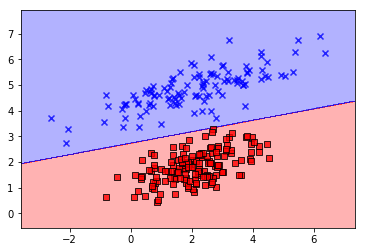

In [83]:
percep = perceptron.Perceptron(random_state=9999, threshold=sys.float_info.epsilon, n_iter=1000)
percep.fit(X, y)
n_iterations = percep.return_iterations()
print("Número de Iterações: %d: " % n_iterations )
ploting.plot_decision_regions(X, y, percep)

### Exercício 3

Nesse exercício, você utilizará os dados disponíveis em "dataset/ex3.data". Leia esses dados e separe $30\%$ das amostras para teste a mantenha os outros $70\%$ para treino utilizando a função **train_test_split** do scikit-learn com **random_state=1** e **stratify=y** (veja um exemplo na seção "First steps with scikit-learn – training a
perceptron" do capitulo $3$ do livro do Sebastian). Depois treine dois classificadores: 

1. **AdalineSGD:** Com os parâmetros n_iter=1500, eta=0.001, random_state=1 e limiar de custo = None
2. **Perceptron:** Com os parâmetros n_iter=1500, eta=0.001, random_state=1 e limiar de custo = None

Agora, plote a região de decisão dos dois classificadores juntamente com a base de dados (treino e teste), destaque as amostras da base de teste e imprima a quantidade de predição incorreta da base de treino para cada classificador.

Observando as plotagens, responda:

- **(1)** Considerando o conceito de margem e erro de generalização visto em aula. Visualmente qual dos classificadores aparenta ter menor erro de generalização.
- **(2)** Analisando o desempenho de teste dos seus classificadores, qual obteve o melhor resultado (menos erros nos dados de teste). Relacione esse resultado com a análise do exercício anterior.

In [85]:
df = pd.read_csv("dataset/ex3.data", sep=';', header=0, names=['x1', 'x2', 'class'])
X, y = np.squeeze(df[['x1', 'x2']]), np.squeeze(np.where(df[['class']] == 'A', 1, -1))
df.head(5)

,x1,x2,class
0,0.776487,2.225614,A
1,0.943656,2.878100,A
2,-0.145937,1.729269,A
3,3.730815,5.495548,A
4,-2.603077,-1.034227,A


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1, stratify=y)

In [88]:
adaline_clf = adaline.AdalineSGD(eta=0.001, n_iter=1500, random_state=1)
perceptron_clf = perceptron.Perceptron(eta=0.001, n_iter=1500, random_state=1)
adaline_clf.fit(x_train.values, y_train)
perceptron_clf.fit(x_train.values, y_train)

0 amostras malclassificadas no treino (Perceptron)


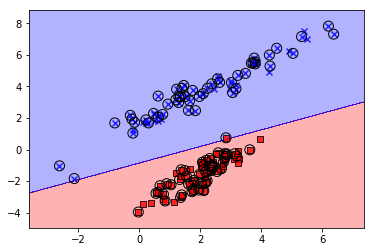

In [89]:
ploting.plot_decision_regions(X.values, y, perceptron_clf, test_idx=x_test.index.tolist())
y_train_perceptron = perceptron_clf.predict(x_train.values)
error_train_perceptron = y_train - y_train_perceptron
print("%d amostras malclassificadas no treino (Perceptron)" % error_train_perceptron[error_train_perceptron!=0].sum())

0 amostras malclassificadas no treino (Adaline)


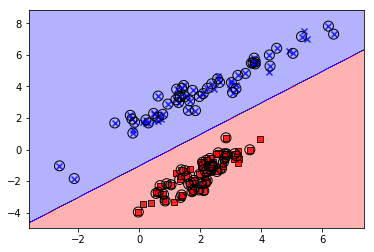

In [90]:
ploting.plot_decision_regions(X.values, y, adaline_clf, test_idx=x_test.index.tolist())
y_train_adaline = adaline_clf.predict(x_train.values)
error_train_adaline = y_train - y_train_adaline
print("%d amostras malclassificadas no treino (Adaline)" % error_train_adaline[error_train_adaline!=0].sum())

O classificador **Adaline** aparenta ter o menor erro de generalização, visto que este separa as duas classes com uma margem melhor

In [91]:
error_test_perceptron = y_test - perceptron_clf.predict(x_test.values)
error_test_adaline= y_test - adaline_clf.predict(x_test.values)
n_error_test_perceptron = abs(error_test_perceptron.sum())
n_error_test_adaline = abs(error_test_adaline.sum())
print("Quantidade de amostras malclassificadas no conjunto de teste (Perceptron): %d" % n_error_test_perceptron)
print("Quantidade de amostras malclassificadas no conjunto de teste (Adaline): %d" % n_error_test_adaline)

Quantidade de amostras malclassificadas no conjunto de teste (Perceptron): 2
Quantidade de amostras malclassificadas no conjunto de teste (Adaline): 0


O classificador Perceptron apresenta duas amostras malclassificadas no conjunto de teste, enquanto o Adaline não apresenta nenhuma. Isto reforça a análise visual anterior, de que o classificador Adaline possui um menor erro de generalização.

### Exercício 4

Vamos utilizar os dados no dataset do arquivo "dataset/ex4.data". Nesse exercício, você deve treinar $3$ classificadores **Adaline** com **random_state=1**, **n_iter=500**, **limiar de custo** = **None**. Então utilize
**eta=$8 \times 10^{-8}$** para o primeiro classificador, **eta=$1 \times 10^{-4}$** para o segundo classificador e **eta=$1.725 \times 10^{-3}$** para o terceiro classificador. Plote o dataset e a superfície de decisão de cada classificador e a função de custo e relacione os gráficos da função de custo com a superfície de decisão. Dentre os valores avaliados qual o valor de **eta** mais adequado para encontrar o classificador com o menor custo em um número baixo de iterações.

In [92]:
df = pd.read_csv("dataset/ex4.data", sep=';', header=0, names=["x1", "x2", "category_class"])
X, y = np.squeeze(df[['x1', 'x2']]), np.squeeze(np.where(df[['category_class']] == 'A', 1, -1))
df.head(5)

,x1,x2,category_class
0,0.776487,2.225614,A
1,0.943656,2.878100,A
2,-0.145937,1.729269,A
3,0.657508,2.179342,A
4,1.974671,3.361514,A


In [93]:
adaline_clfs = {}
adaline_clfs["Adaline_CLF_1"] = adaline.AdalineGD(random_state=1, n_iter=500, eta = 8e-08, threshold=None)
adaline_clfs["Adaline_CLF_2"] = adaline.AdalineGD(random_state=1, n_iter=500, eta = 1e-04, threshold=None)
adaline_clfs["Adaline_CLF_3"] = adaline.AdalineGD(random_state=1, n_iter=500, eta = 1.725e-03, threshold=None)

In [94]:
for i,_ in enumerate(adaline_clfs):
    adaline_clfs["Adaline_CLF_" + str(i+1)].fit(X, y)

Adaline eta = 8e-08
Cost:  38.84104735908988


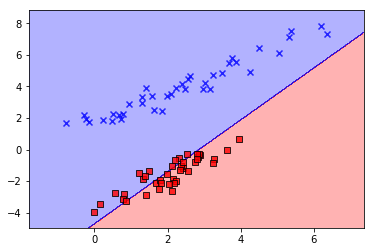

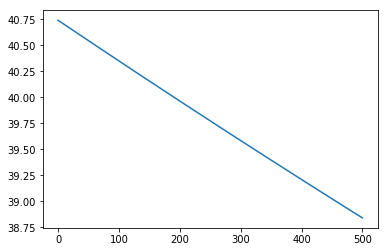

In [95]:
plt.figure(1)
ploting.plot_decision_regions(X.values, y, adaline_clfs["Adaline_CLF_1"])
plt.figure(2)
plt.plot(adaline_clfs["Adaline_CLF_1"].cost_)
print("Adaline eta =", 8e-08)
print("Cost: ", adaline_clfs["Adaline_CLF_1"].cost_[-1])


Adaline eta = 0.0001
Cost:  1.5721706118742347


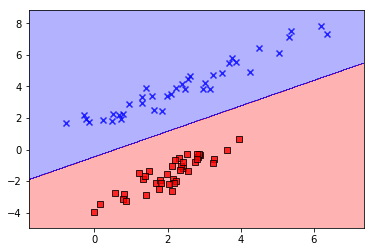

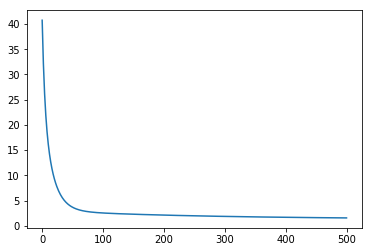

In [96]:
plt.figure(1)
ploting.plot_decision_regions(X.values, y, adaline_clfs["Adaline_CLF_2"])
plt.figure(2)
plt.plot(adaline_clfs["Adaline_CLF_2"].cost_)
print("Adaline eta =", 1e-04)
print("Cost: ", adaline_clfs["Adaline_CLF_2"].cost_[-1])

Adaline eta = 0.001725
Cost:  51097.67584035932


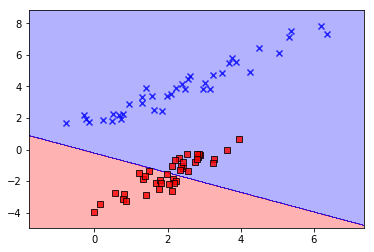

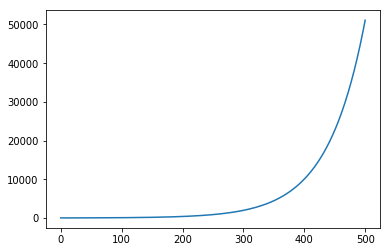

In [97]:
plt.figure(1)
ploting.plot_decision_regions(X.values, y, adaline_clfs["Adaline_CLF_3"])
plt.figure(2)
plt.plot(adaline_clfs["Adaline_CLF_3"].cost_)
print("Adaline eta =", 1.725e-03)
print("Cost: ", adaline_clfs["Adaline_CLF_3"].cost_[-1])

**Classificador 1 (*Adaline_CLF_1*)**:
    
    Por ter um valor muito baixo para o parâmetro eta, não conseguiu convergir num numero pequeno de iterações, e logo apresentou o maior valor para a função de custo em sua última iteração, sendo o pior entre os três.
   
   
**Classificador 2 (*Adaline_CLF_2*)**:
    
    Apresentou o menor valor para a função de custo em sua última iteração, sendo o melhor entre os três, porém precisou de mais do que 100 iterações para convergir.
    

**Classificador 3 (*Adaline_CLF_3*)**:
    
    Apresentou o segundo menor valor para a função de custo em sua última iteração, e convergiu após poucas iterações, entretando começou a divergir após 300 iterações, aproximadamente.
    
Logo o melhor valor de *eta* para se encontrar o classificador com menor custo, e em poucas iterações, para este conjunto é $1.725 \times 10^{-3}$

### Exercício 5

Conforme visto em aula, o coeficiente de aprendizado é um parâmetro importante para que o algoritmo de aprendizagem obtenha convergência em um número pequeno de iterações. Esse número de iterações para convergência está ligado diretamente com a escala e a média dos valores de características. Em aula, foi apresentado uma transformação **T** no dataset que visa manter a escala e a média igual para todas as características. Nesse exercício, você deve treinar dois classificadores Adaline Estocásticos com **eta=8e-5** e **random_state=1**. Seus classificadores devem executar até que o custo seja menor que **0.045**. Em um deles você não executa a transformação **T** no seu dataset e no outro você deve executar essa transformação. Explique a diferença no número de iterações do algoritmo de aprendizagem com e sem a transformação.

**DICA**: Você pode alterar o código do classificador Adaline Estocástico para que ele forneça a quantidade de épocas executadas.

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [99]:
scaler = StandardScaler()
adaline_sgd_t = make_pipeline(scaler, adaline.AdalineSGD(eta=8e-5, random_state=1, threshold=0.045))
adaline_sgd = adaline.AdalineSGD(eta=8e-5, random_state=1, threshold=0.045)

In [100]:
adaline_sgd_t.fit(X.values, y)
adaline_sgd.fit(X.values, y)

In [101]:
print("Número de iterações do classificador com transformação: ", adaline_sgd_t[1].iterations)
print("Número de iterações do classificador sem transformação: ", adaline_sgd.iterations)

Número de iterações do classificador com transformação:  412
Número de iterações do classificador sem transformação:  67


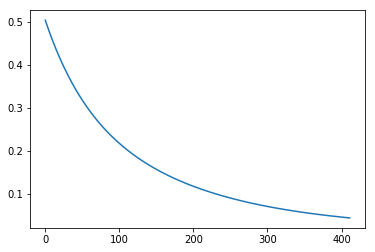

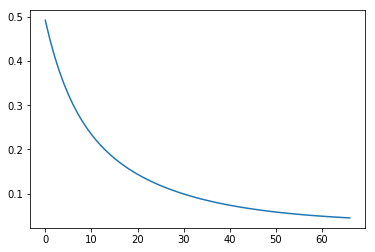

In [102]:
plt.figure(1)
plt.plot(adaline_sgd_t[1].cost_)
plt.figure(2)
plt.plot(adaline_sgd.cost_)

Devido ao baixo valor do parâmetro *eta*, os dados que **não** foram transformados apresentam uma mais rápida convergência, porém mais abrupta. Enquanto os dados transformados apresentaram uma convergência mais demorada, porém mais suave. Se o parâmetro *eta* fosse maior, convergi-se-iam mais rapidamente os dados **transformados**.

### Exercício 6

Durante as aulas, quando trocamos a função de ativação $\Phi$ da **identidade** para a função **sigmoid** no classificador de regressão logística, trocamos também a função de custo do **Mean square error (MSE)** pelo logaritmo negativo da verossimilhança. Nesse exercício, vamos analisar o porquê de não utilizarmos o **MSE** com função de ativação do classificador de regressão logistica. Para isso, vamos fixar os valores de $b = 10$ e $w_2 = 0.05$. Então gere $2000$ pontos de $-50$ a $50$ para $w_1$. Utilizando a base de dados no arquivo **dataset/ex5.data** plote a função de custo **MSE** com a função sigmoid como ativação. Então analisando o gráfico, diga porque a função de custo **MSE** com sigmoid não é uma boa escolha para o treinamento de um classificador.

In [103]:
df = pd.read_csv("dataset/ex5.data", sep=';', header=0, names=["x1", "x2", "category_class"])
X, y = np.squeeze(df[['x1', 'x2']]), np.squeeze(np.where(df[['category_class']] == 'A', 1, 0))
df.head(5)

,x1,x2,category_class
0,-0.304878,50.711947,A
1,-0.263086,32.297074,A
2,-0.535484,11.476711,A
3,0.433704,33.080361,A
4,-1.149769,15.811168,A


In [104]:
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score

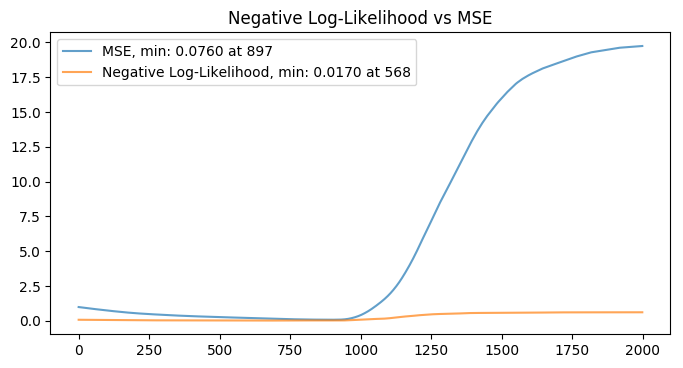

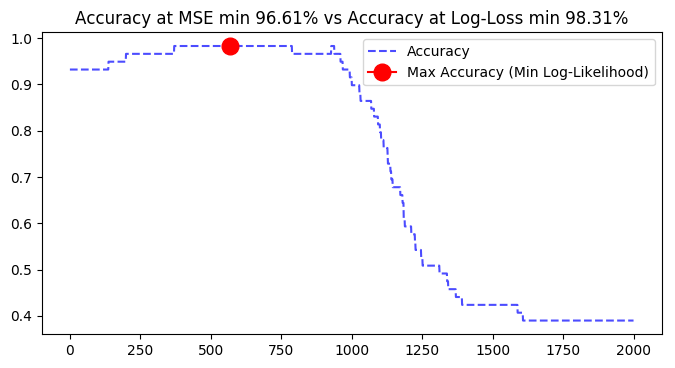

In [145]:
def lr(w1, w2, b, x, y):
    w = [w1, w2]
    input_lr = np.dot(x, w) + b
    activation = 1. / (1. + np.exp(-input_lr))
    return log_loss(y, activation), mean_squared_error(y, activation), accuracy_score(y, np.where(activation >= 0.5, 1, 0))

w1 = np.linspace(-50, 50, 2000)
w2 = 0.5
b = 10
cost_mse = []
cost_logloss = []
accuracies = []
for i in w1:
    cost_mse_, cost_logloss_, accuracies_ = lr(i, w2, b, X, y)
    cost_mse.append(cost_mse_)
    cost_logloss.append(cost_logloss_)
    accuracies.append(accuracies_)

    
plt.figure(1, figsize=(8,4), dpi=100)
plt.title("Negative Log-Likelihood vs MSE")
plt.plot(cost_mse, alpha=0.7, label="MSE, min: {:.4f} at {}".format(np.min(cost_mse), np.argmin(cost_mse)))
plt.plot(cost_logloss, alpha=0.7, label="Negative Log-Likelihood, min: {:.4f} at {}".format(np.min(cost_logloss), np.argmin(cost_logloss)))
plt.legend()
plt.figure(2, figsize=(8,4), dpi=100)
plt.title("Accuracy at MSE min {:.2f}% vs Accuracy at Log-Loss min {:.2f}%".format(accuracies[np.argmin(cost_mse)]*100, accuracies[np.argmin(cost_logloss)]*100))
acc_idx = list(range(len(accuracies)))
max_acc = accuracies.pop(np.argmin(cost_logloss))
max_acc_idx = acc_idx.pop(np.argmin(cost_logloss))
plt.plot(acc_idx, accuracies, alpha=0.7, marker='', color='blue', linestyle='dashed', label="Accuracy")
plt.plot(max_acc_idx, max_acc, alpha=1, marker='o', markersize=12, color='red', label="Max Accuracy (Min Log-Likelihood)")
plt.legend()

Analisando o gráfico acima, podemos verificar que a maior acurácia encontra-se onde há o menor **negativo da verossimilhança**, e não no menor **MSE**. Diante disto, o **MSE** mostra-se uma medida ineficiente para ser utilizada como função de custo em um problema de classificação, com a função de ativação sigmoid.

In [49]:
testx1 = np.array([0, 2, 4])
testx1
testx2 = np.array([1, 3, 5])
testx2
polynomials.feature2d_to_polynomial(testx1, testx2, 2)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

### Exercício 7

Nesse exercício você deve utilizar o classificador de regressão logística implementado pelo scikit-learn [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

Conforme visto em aula, é possível obter superfícies de decisão mais complexa que uma linha utilizando classificadores lineares transformando os vetores de características em polinômios. Nesse exercício, você deve implementar ou modificar as funções que estão no modulo **benlau/polynomials** assim como implementar a função **plot_logistic_regression_polynomials** na célula abaixo. Primeiro, você deve implementar a função **feature2d_to_polynomial** no modulo **benlau/polynomials** que recebe as listas **feature1**, **feature2** contendo todos os dados da primeira e segunda característica respectivamente, **poly_degree*** que denota o grau do polinômio e retorna uma matriz de características representando um polinômio de grau **poly_degree**. Depois, você deve modificar a função **plot_decision_regions_polynomials** que atualmente é uma cópia da função **plot_decision_regions** do livro do Sebastian e Mirjalili. Essa função recebe uma matriz contendo os vetores de características 2D **X**, o conjunto de classes **y**, um classificador treinado **classifier** e o grau do polinômio utilizado no treinamento do classificador **poly_degree** e você deve modificar para plotar os pontos dos vetores de características e as regiões de decisão.

Então utilizando as funções modificadas e implementadas do modulo **benlau/polynomials** você deve implementar a função **plot_logistic_regression_polynomials_3** que recebe um parâmetro **C** e executa os seguintes passos: $(i)$ lê os dados do arquivo **dataset/ex6.data**, $(ii)$ transforma os vetores de características em polinômios de grau $3$, $(iii)$ treina um classificador de regressão logística utilizando **max_iter=200**, **random_state=1** e **C** igual ao valor do parâmetro **C** da função e $(iv)$ plota o dataset com a superfície de decisão.

Note que a célula abaixo possui um **TextBox** interativo que permite você modificar o valor do parâmetro **C** interativamente e verificar a plotagem pressionando o **Enter**. Leia a documentação do classificador de regressão logística do scikit-learn e justamente com a plotagem da superfície de decisão para diferentes valores de **C** diga qual técnica vista em aula esse parâmetro corresponde e explique a relação desse parâmetro com a complexidade do modelo e o sobreajuste (*overfitting*).

In [51]:
df = pd.read_csv("dataset/ex6.data", sep=';', header=0, names=["x1", "x2", "category_class"])
df

,x1,x2,category_class
0,3.772873,4.368523,A
1,1.000645,1.949935,A
2,2.310039,4.583737,A
3,1.706173,2.960335,A
4,1.467030,3.384804,A
5,1.868684,3.943977,A
6,2.465124,3.063046,A
7,2.644829,2.289909,A
8,3.132948,1.874547,A
9,2.722556,1.413228,A


In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.linear_model import LogisticRegression
from benlau.polynomials import feature2d_to_polynomial, plot_decision_regions_polynomials

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_logistic_regression_polynomials(C=0.0001):
    pass

def plot_logistic_regression_polynomials_3(C=0.0001, poly_degree=3):
    df = pd.read_csv("dataset/ex6.data", sep=';', header=0, names=["x1", "x2", "category_class"])
    X, y = np.squeeze(df[['x1', 'x2']]), np.squeeze(np.where(df[['category_class']] == 'A', 1, 0))
    pos , neg = (y==1).reshape(y.shape[0],1) , (y==0).reshape(y.shape[0],1)
    X = polynomials.feature2d_to_polynomial(x)
    plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="A")
    plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="B")
    
interact(plot_logistic_regression_polynomials, 
         C=widgets.BoundedFloatText
         (value=0.0001,
          min=0.0001, 
          max=5.0,
          step=0.001, 
          description="C:", 
          disabled=False))

interactive(children=(BoundedFloatText(value=0.0001, description='C:', max=5.0, min=0.0001, step=0.001), Outpu…

<function __main__.plot_logistic_regression_polynomials(C=0.0001)>

### Exercício 8

Nesse exercício, você deve utilizar o dataset no arquivo **"dataset/heart.csv"** que obtido pelo site [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci). Esse **dataset** é formado por linhas que representam atributos de pacientes diagnosticados com doença do coração ou não. Cada paciente possui os seguintes atributos:

- 1. **age**: idade;
- 2. **sex**: genero com 1 = masculino e 0 = feminino;
- 3. **cp**: localização de dor no peito (*chest pain location*) com 1 = subesterna e 0 = caso contrário;
- 4. **trestbps**: pressão arterial em repouso;
- 5. **chol**: serum colesterol em mg/dl;
- 6. **fbs**: diabetes em repouso (*fasting blood sugar) > 120 mg/dl;
- 7. **restecg**: resultado de eletrocardiográfica em repouso (*resting electrocardiographic result). Valores de 0 a 2;
- 8. **thalach**: Taxa de batimento do coração máxima;
- 9. **exang**: angina induzida por exercício com 1 = sim e 0 = não;
- 10. **oldpeak**: depressão ST induzida por exercício relativa com repouso;
- 11. **slope**: Inclinação do pico no segmento do exercício ST com 1 = crescente, 2 = reto, 3 = decrescente;
- 12. **ca**: Número de vasos principais (0-3) colorido com fluoroscopia;
- 13. **thal**: 3 = normal, 6 = defeito fixo e 7 defeito reversivel;
- 14. **target**: Diagnostico com 1 = paciente com doença e 0 = paciente sem doença.

Nesse exercício, você deve utilizar os dados do dataset acima para estimar a probabilidade de uma pessoa ser diagnosticada com doença no coração de acordo com certo características. Para isso, você deve:

- **Passo 1.** Lêr o dataset em **dataset/heart.csv**;
- **Passo 2.** Remover as características categóricas. Ou seja, **mantenha** apenas as carateristicas **(1.) age**
    **(3.) cp**, **(4.) cp**, **(8.) thalach**;
- **Passo 3.** Treine um classificador que permita estimar a probabilidade de uma amostra pertencer a uma classe;
- **Passo 4.** Gere um dataset de testes com pacientes com idade 30, 40, 50, 60 e 70. Para outras características, você deve gerar 10 amostras igualmente espaçadas entre o valor mínimo e o valor máximo e então gere o dataset com todas as possíveis combinações desses valores gerados incluindo a idade;
- **Passo 4.** Utilizando o classificador treinado, estime a probabilidade de pacientes com 30, 40, 50, 60 e 70 anos possuírem doença do coração calculando a média da probabilidade de todas as amostras com a mesma idade. Exiba essas probabilidades;
- **Passo 5** Para todas as outras características, divida cada uma delas em 5 intervalos, onde os 4 primeiros intervalos tem o mesmo tamanho e o último intervalo vai do fim do penúltimo intervalo até infinito. Para cada intervalo de cada característica, estime a probabilidade da amostra possuir doença do coração calculando a média das probabilidades estimadas pelo classificador treinado de todas as amostras com valores da característica dentro do intervalo. Exiba essas probabilidades.
    
Utilize a implementação do classificador da biblioteca do [scikit-learn](https://scikit-learn.org/stable/).

****

OBS.: observe que o método utilizado para estimar as probabilidades é muito simplificado. Nessa estimativa, estamos considerando que a probabilidade de um paciente aparacer com qualquer valor das características avaliadas é igual, ou seja, estamos considerando que as características são distribuídas uniformemente entre os pacientes. Uma estimativa mais robusta deve considerar as correlações entre as características avaliadas

****

### Exercício 9

Nesse exercício, vamos trabalhar com a distância das amostras mais próximas à superfície de decisão. Primeiro você deve ler os dados que estão no arquivo **dataset/ex8.data**. Esse dataset é um arquivo csv onde cada linha possui valores de 2 características e uma classe (**A** ou **B**). Então crie e treine $4$ classificadores: **Perceptron**, **Adaline** (SGDClassifier no scikit-learn), **Regressão Logística** e **SVM** (LinearSVC no scikit-learn). Treine eles com **random_state=1** e **max_iter=500**. Para **Regressão Logística** e **SVM** utilize a constante **C=1000**. Então para cada um desses classificadores encontre os pontos $x_p$ e $x_n$, tal que, $x_p$ é o ponto onde o valor $z_p = \vec{w}^t \vec{x_p} + b \geq 0$ é mais próximo de $0$ e $x_n$ é ponto onde o valor $z_n = \vec{w}^t \vec{x_p} + b < 0$ é mais próximo de $0$. Plote a região de decisão para cada classificador e os hiperplanos $\vec{w}^t \vec{x_p} + b = z_n$ e $\vec{w}^t \vec{x_p} + b = z_p$. Exiba os valores de $z_p$, $z_n$ da margem de cada classificador. Exceto por erros numéricos, os valores obtidos pelo classificador **SVM** são os esperados pelo conteúdo visto em aula? Explique. Qual classificador tende a ter menor erro de generalização de acordo com o conteúdo discutido em aula? Por quê?

### Comentários

Utilize a célula abaixo caso deseja comentar e passar o feedback sobre o exercício.